# Projeto Final do Módulo de Estatística I
#### Descrição:
    Realizar uma análise descritiva de uma base de dados definindo motivação e hipótese.
#### Regras:
- Tente utilizar todos os tópicos aprendidos em sala de aula.

#### Grupo composto por:
- Rayssa Vilaça
---

## Problema

**Motivação**: gostaria de compreender o impacto do gênero do jogo nas vendas, analisando o total de unidades vendidas desde o ano de lançamento de cada título. Meu objetivo é identificar as tendências entre as diferentes categorias de jogos.

**Hipótese**: jogos de ação são mais vendidos do que jogos de simulação.

## Dados
Necessitamos de uma base de dados com a quantidade de unidades vendidas por jogo desde o seu lançamento. Para esta análise, será utilizado o conjunto de dados [Video Games Sales](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020?select=watching_status.csv). Através do kaggle, consegui rastrear a fonte desses dados como sendo obtidos pelo **vgchartz** que é um site de monitoramento de vendas de jogos eletrônicos. Vale ressaltar que desde 2018 o **vgchartz** apenas registra dados oficiais de vendas de software disponibilizados por programadores e editores (essa informação pode ser encontrada no site do [vgchartz](https://www.vgchartz.com/methodology.php)).

A base contém um único arquivo chamado **video_games_sales.csv**. Este arquivo possui as seguintes colunas:

* **rank**: posição do jogo em relação ao número total de cópias vendidas
* **name**: nome do jogo eletrônico
* **platform**: plataforma utilizada
* **year**: ano de lançamento
* **genre**: gênero do jogo
* **publisher**: nome da empresa responsável pela publicação e distribuição do jogo
* **na_sales**: número de cópias vendidas na América do Norte em **milhões**
* **eu_sales**: número de cópias vendidas na Europa em **milhões**
* **jp_sales**: número de cópias vendidas no Japão em **milhões**
* **other_sales**: número de cópias vendidas em outras áreas em **milhões**
* **global_sales**: número total de cópias vendidas em todas as áreas em **milhões**


### Importações

In [27]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, shapiro, normaltest

### Configurações iniciais

In [2]:
plt.style.use('fivethirtyeight')

### Descrição da base de dados

In [3]:
df_video_game = pd.read_csv('assets/video_games_sales.csv')

In [4]:
df_video_game.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
qtd_registros = df_video_game.shape[0]
qtd_atributos = df_video_game.shape[1]
print(f'A base possui {qtd_registros} registros e {qtd_atributos} atributos.\nAs colunas são: {", ".join(df_video_game.columns)}')

A base possui 16598 registros e 11 atributos.
As colunas são: rank, name, platform, year, genre, publisher, na_sales, eu_sales, jp_sales, other_sales, global_sales


* A variável **rank** é quantitativa discreta
* A variável **name** é qualitativa nominal
* A variável **platform** é qualitativa nominal
* A variável **year** é quantitativa discreta
* A variável **genre** é qualitativa nominal
* A variável **publisher**: qualitativa nominal
* A variável **na_sales**: quantitativa contínua
* A variável **eu_sales**: quantitativa contínua
* A variável **jp_sales**: quantitativa contínua
* A variável **other_sales**: quantitativa contínua
* A variável **global_sales**: quantitativa contínua

In [6]:
df_video_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
"""
Analisando ano de lançamento com valor nulo
"""

df_video_game.loc[df_video_game['year'].isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [8]:
""" 
É possível observar que alguns jogos incluem um ano em seus títulos. Em jogos de esportes, essa prática é comum e geralmente
o ano no título representa o ano seguinte ao lançamento efetivo do jogo. Por exemplo, o FIFA 2004 foi lançado no final de 2003.
Acredito que essa estratégia seja para manter o jogo atualizado, evitando a impressão de obsolescência. Se o jogo fosse lançado em outubro
de 2003 e o título tivesse o ano de 2003, na virada para 2004, poderia parecer desatualizado, apesar de ter sido lançado apenas alguns
meses atrás. Não sei se há um consenso claro sobre essa prática, mas parece haver uma tendência de atribuir o ano do título de acordo com a
proximidade do lançamento. Ou seja, para títulos lançados no ínicio do ano, utilizar no nome o ano em questão e títulos lançados no final
do ano, usar o ano seguinte.

Podemos verificar esse comportamente ao analisar os registros cujo título contém um ano e comparar com o valor do ano de lançamento.
"""

df_video_game.loc[df_video_game['name'].str.contains('\d{4}') & (df_video_game['genre'] == 'Sports') & ~df_video_game['year'].isna()]

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
238,239,Madden NFL 2005,PS2,2004.0,Sports,Electronic Arts,4.18,0.26,0.01,0.08,4.53
249,250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.39
279,280,Madden NFL 2003,PS2,2002.0,Sports,Electronic Arts,3.36,0.21,0.01,0.56,4.14
323,324,Mario & Sonic at the London 2012 Olympic Games,Wii,2011.0,Sports,Sega,1.14,1.91,0.27,0.46,3.78
334,335,FIFA Soccer 2005,PS2,2004.0,Sports,Electronic Arts,0.58,2.48,0.04,0.59,3.70
...,...,...,...,...,...,...,...,...,...,...,...
16420,16423,Winning Eleven: Pro Evolution Soccer 2007,PC,2006.0,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16426,16429,ESPN NBA 2Night 2002,XB,2002.0,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00,0.01
16441,16444,G1 Jockey 4 2007,PS2,2007.0,Sports,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16459,16462,Rugby World Cup 2015,PC,2015.0,Sports,Ubisoft,0.00,0.01,0.00,0.00,0.01


In [9]:
"""
Optei por preencher o ano de valor nulo para os jogos de esportes utilizando o ano anterior ao contido no título. Apenas preencherei
os anos cujo o título possua o ano completo sem abreviar para apenas os últimos 2 dígitos por ser mais fácil de identificar.
"""

def extrair_ano(linha):
    if np.isnan(linha['year']) and linha['genre'] == 'Sports':
        ano = re.search(r'\b\d{4}\b', linha['name'])
        if ano:
            return ano.group()
    
    return linha['year']

df_video_game['year'] = df_video_game.apply(extrair_ano, axis=1)
df_video_game.head(10)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [10]:
# Analisar os anos com valores nulos restantes
qtd_dados_ano_nulo = df_video_game.loc[df_video_game['year'].isna()].shape[0]
print(f'Porcentagem de dados com ano nulo: {qtd_dados_ano_nulo}/{qtd_registros} = {qtd_dados_ano_nulo/qtd_registros * 100:.2f}%')

# Para o restante dos registros que contem a coluna 'year' vazia, irei deletar os dados.
df_video_game_filtrado = df_video_game.loc[~df_video_game['year'].isna()].copy()
df_video_game_filtrado.head(10)


Porcentagem de dados com ano nulo: 259/16598 = 1.56%


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [11]:
df_video_game_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16339 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16339 non-null  int64  
 1   name          16339 non-null  object 
 2   platform      16339 non-null  object 
 3   year          16339 non-null  object 
 4   genre         16339 non-null  object 
 5   publisher     16303 non-null  object 
 6   na_sales      16339 non-null  float64
 7   eu_sales      16339 non-null  float64
 8   jp_sales      16339 non-null  float64
 9   other_sales   16339 non-null  float64
 10  global_sales  16339 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [12]:
dict_tipos = {
    'year': 'int',
}

dict_nomes_coluna = {
    'year':'year_of_release'
}

df_video_game_filtrado = df_video_game_filtrado.astype(dict_tipos)
df_video_game_filtrado.rename(columns=dict_nomes_coluna, inplace=True)
df_video_game_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16339 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             16339 non-null  int64  
 1   name             16339 non-null  object 
 2   platform         16339 non-null  object 
 3   year_of_release  16339 non-null  int64  
 4   genre            16339 non-null  object 
 5   publisher        16303 non-null  object 
 6   na_sales         16339 non-null  float64
 7   eu_sales         16339 non-null  float64
 8   jp_sales         16339 non-null  float64
 9   other_sales      16339 non-null  float64
 10  global_sales     16339 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [13]:
df_video_game_filtrado[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16339.000000,16339.000000,16339.000000,16339.000000,16339.00000
mean,0.265615,0.147653,0.078622,0.048384,0.54055
std,0.821901,0.508883,0.311452,0.189925,1.56578
min,0.000000,0.000000,0.000000,0.000000,0.01000
25%,0.000000,0.000000,0.000000,0.000000,0.06000
50%,0.080000,0.020000,0.000000,0.010000,0.17000
75%,0.240000,0.110000,0.040000,0.040000,0.48000
max,41.490000,29.020000,10.220000,10.570000,82.74000


In [14]:
"""
Dado que a coluna 'global_sales' não apresenta valor zero, isso sugere que todos os jogos foram lançados em pelo menos uma região,
o que, à primeira vista, não levanta preocupações sobre a integridade dos dados. Entretanto, é preciso realizar uma análise mais
profunda para ter certeza.

- Analisando a falta de vendas em algumas regiões, o motivo pode ser devido à ausência de dados para essas regiões ou 
simplesmente porque os jogos em questão não foram lançados nesses locais."
"""
df_video_game_filtrado.loc[df_video_game['na_sales'] == 0.]


,rank,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.0,0.00,4.87,0.00,4.87
338,339,Friend Collection,DS,2009,Misc,Nintendo,0.0,0.00,3.67,0.00,3.67
383,384,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0.0,0.00,3.44,0.00,3.44
402,403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,Nintendo,0.0,0.99,2.32,0.02,3.33
426,427,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,Enix Corporation,0.0,0.00,3.19,0.00,3.19
...,...,...,...,...,...,...,...,...,...,...,...
16587,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.0,0.00,0.01,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.0,0.00,0.01,0.00,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.0,0.00,0.01,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.0,0.00,0.00,0.00,0.01


Após analisar os títulos e como os dados em **vgchartz** foram filtrados para a construção desse dataset, pode-se concluir que são jogos lançados exclusivamente em determinadas áreas, geralmente no Japão.

In [15]:
df_video_game_filtrado['genre'].value_counts()

genre
Action          3253
Sports          2316
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: count, dtype: int64

### Visualização

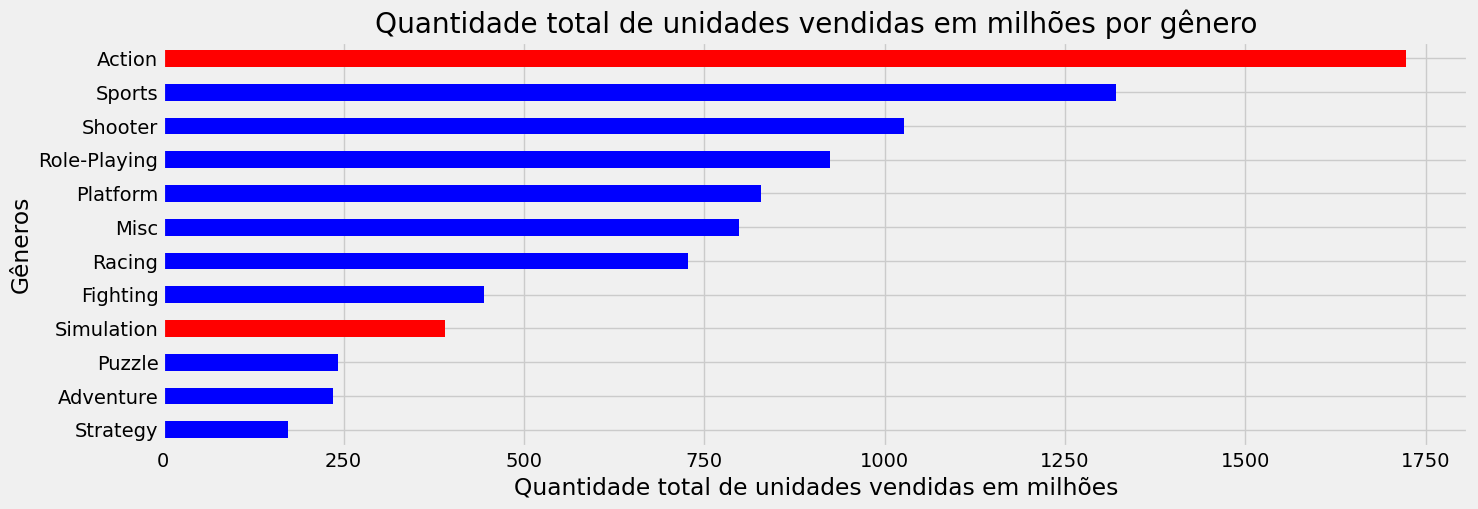

In [16]:
df_genre_global_sales = df_video_game_filtrado.groupby('genre')['global_sales'].sum().sort_values()

plt.figure(figsize=(15, 5))
cores = df_genre_global_sales.reset_index()['genre'].apply(lambda x: 'blue' if x != 'Action' and x != 'Simulation' else 'red')
df_genre_global_sales.plot(kind='barh', color=cores)
plt.ylabel('Gêneros')
plt.xlabel('Quantidade total de unidades vendidas em milhões')
plt.title('Quantidade total de unidades vendidas em milhões por gênero')
plt.show()

Houve mais unidades vendidas para jogos do gênero ação, porém a quantidade de jogos desse gênero também é superior a quantidade de jogos de outras categorias

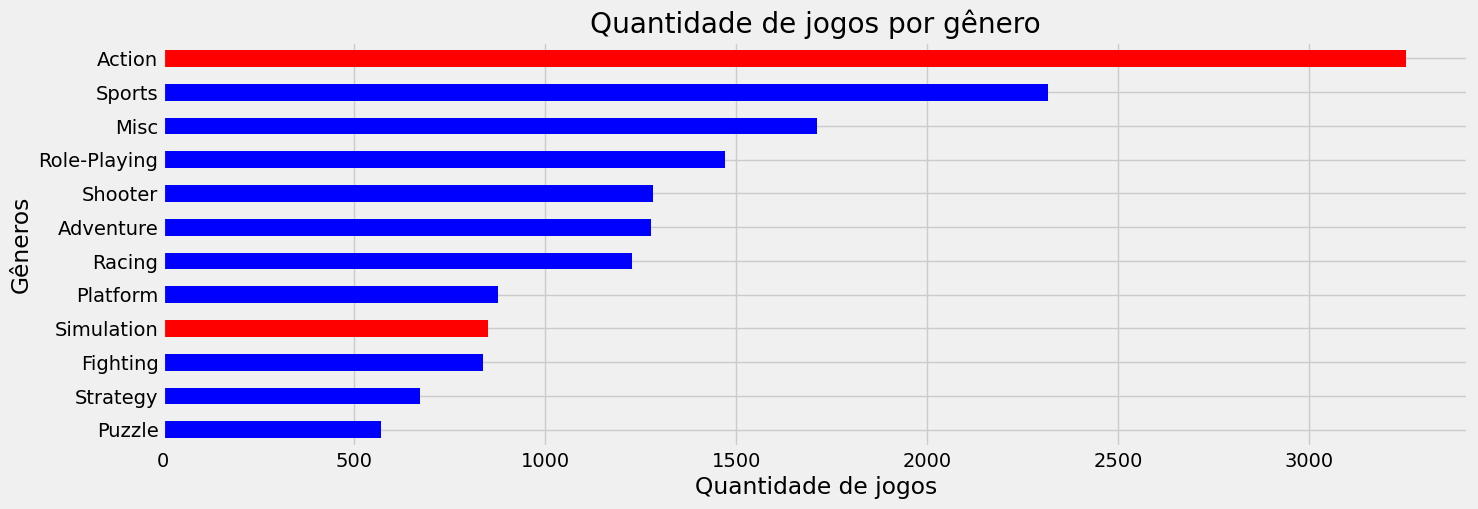

In [17]:
df_genre_count_jogos = df_video_game_filtrado.groupby('genre')['name'].count().sort_values()

plt.figure(figsize=(15, 5))
cores = df_genre_count_jogos.reset_index()['genre'].apply(lambda x: 'blue' if x != 'Action' and x != 'Simulation' else 'red')
df_genre_count_jogos.plot(kind='barh', color=cores)
plt.ylabel('Gêneros')
plt.xlabel('Quantidade de jogos')
plt.title('Quantidade de jogos por gênero')
plt.show()

<Axes: >

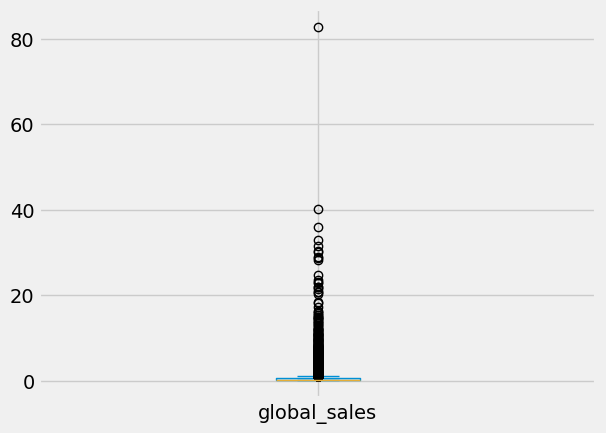

In [18]:
"""
Vamos identificar os outliers
"""
df_video_game_filtrado['global_sales'].plot(kind='box')

In [19]:
df_video_game_filtrado.describe(percentiles=[.01, 0.05, 0.25, 0.5, 0.75, 0.8, 0.99])

,rank,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16339.000000,16339.000000,16339.000000,16339.000000,16339.000000,16339.000000,16339.00000
mean,8291.966828,2006.405472,0.265615,0.147653,0.078622,0.048384,0.54055
std,4793.413584,5.827270,0.821901,0.508883,0.311452,0.189925,1.56578
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.01000
1%,164.380000,1987.000000,0.000000,0.000000,0.000000,0.000000,0.01000
5%,826.900000,1996.000000,0.000000,0.000000,0.000000,0.000000,0.02000
25%,4135.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.06000
50%,8293.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.17000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.48000
80%,13273.400000,2011.000000,0.310000,0.160000,0.060000,0.050000,0.61000


In [20]:
percentile_1 = df_video_game_filtrado['global_sales'].quantile(0.01)
percentile_99 = df_video_game_filtrado['global_sales'].quantile(0.99)
df_video_game_filtrado_sem_extremos = df_video_game_filtrado[(df_video_game_filtrado['global_sales'] >= percentile_1) & (df_video_game_filtrado['global_sales'] <= percentile_99)]

In [21]:
df_video_game_filtrado_sem_extremos.describe()

,rank,year_of_release,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16175.000000,16175.000000,16175.000000,16175.000000,16175.000000,16175.000000,16175.000000
mean,8375.203462,2006.417929,0.213074,0.114984,0.063840,0.038247,0.430428
std,4745.468402,5.808753,0.389143,0.254557,0.207063,0.097401,0.706215
min,165.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4262.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8377.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12482.500000,2010.000000,0.230000,0.110000,0.030000,0.030000,0.460000
max,16600.000000,2020.000000,4.260000,3.750000,4.870000,2.930000,5.460000


### Teste de hipótese

Testar a hipótese de que
a venda média dos jogos de ação é maior que a venda média dos jogos do gênero simulação.

> Usaremos nível de significância de 5%

In [22]:
"""
Dados do problema
"""
significancia = 0.05
confianca = 1 - significancia

In [23]:
"""
Vamos selecionar amostras para cada uma das duas categorias (variável genre) para realizar o teste
"""
unidades_jogos_vendidas_acao = df_video_game_filtrado.query('genre == "Action"').sample(n=500, random_state=666)['global_sales']
unidades_jogos_vendidas_simulacao = df_video_game_filtrado.query('genre == "Simulation"').sample(n=500, random_state=666)['global_sales']

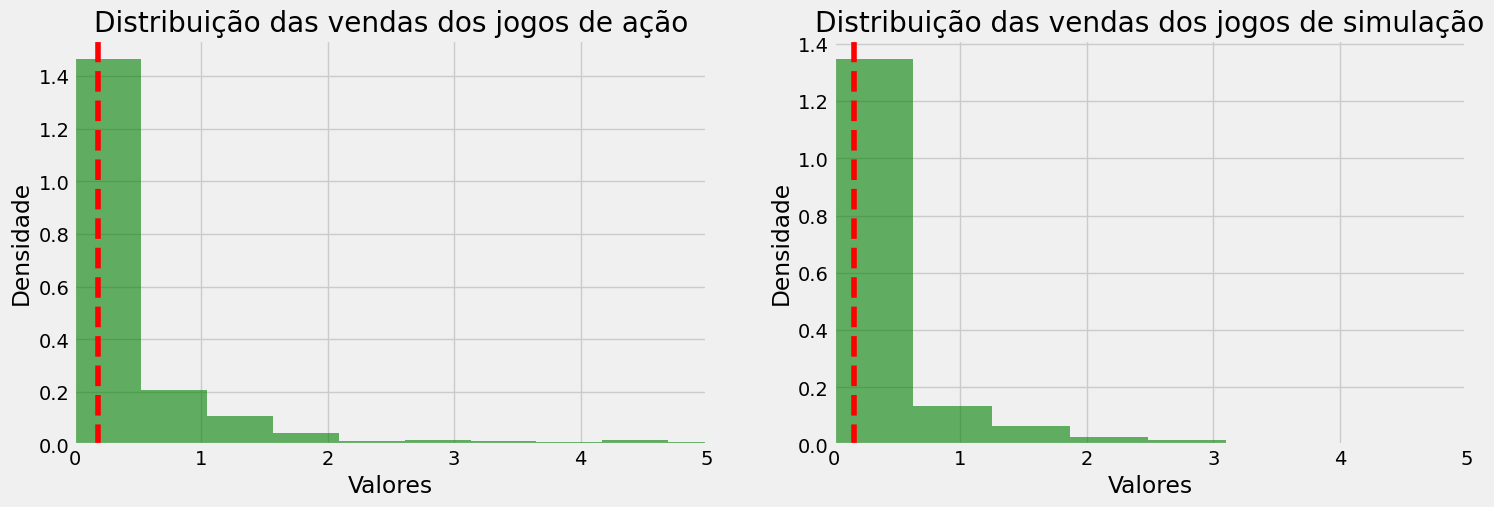

In [24]:
"""
Uma distribuição normal tem o formato característico de um sino. Vamos verificar se as nossas amostras
possuem esse formato.
"""
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.hist(unidades_jogos_vendidas_acao, bins=40, density=True, alpha=0.6, color='g')
plt.axvline(x=unidades_jogos_vendidas_acao.median(), color='r', linestyle='--')
plt.title('Distribuição das vendas dos jogos de ação')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.grid(True)
plt.xlim(0, 5)

plt.subplot(1, 2, 2)
plt.hist(unidades_jogos_vendidas_simulacao, bins=40, density=True, alpha=0.6, color='g')
plt.axvline(x=unidades_jogos_vendidas_simulacao.median(), color='r', linestyle='--')
plt.title('Distribuição das vendas dos jogos de simulação')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.grid(True)
plt.xlim(0, 5)

plt.subplot(1, 2, 1)
plt.show()

In [28]:
def testar_normalidade(dados, teste='normaltest'):
    
    """
    Esta função realiza o teste de normalidade em uma série de dados utilizando o teste indicado.

    Parâmetros:
    dados (pandas.Series): a série de dados que deseja verificar a normalidade.
    teste (str): o tipo de teste de normalidade a ser realizado. (shapiro ou normaltest[padrão])
    Retorna:
        None
    """
    
    if teste == 'normaltest':
        stat_test, p_valor = normaltest(dados)
        print("="*4 + " normaltest " + "="*4)
    elif teste == 'shapiro':
        stat_test, p_valor = shapiro(dados)
        print("="*4 + " shapiro " + "="*4)
    
    print("Estatística de teste:", stat_test)
    print("Valor de p:", p_valor)
    if p_valor < significancia:
        print("Rejeitamos a hipótese nula, logo os dados NÃO seguem uma distribuição normal.")
    else:
        print("Não rejeitamos a hipótese nula, logo os dados seguem uma distribuição normal.")
    print("-"*100)

In [29]:
"""
Como pode ser visto, a distribuição não possui o formato esperado. Portanto, vamos utilizar o normaltest para concluir se a nossa amostra segue
ou não uma distribuição normal através de um teste formal.
"""
testar_normalidade(unidades_jogos_vendidas_acao)
testar_normalidade(unidades_jogos_vendidas_acao, teste='shapiro')
testar_normalidade(unidades_jogos_vendidas_simulacao)
testar_normalidade(unidades_jogos_vendidas_simulacao, teste='shapiro')

==== normaltest ====
Estatística de teste: 823.8770087214239
Valor de p: 1.2513554016997563e-179
Rejeitamos a hipótese nula, logo os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------------------------------------
==== shapiro ====
Estatística de teste: 0.369253581444252
Valor de p: 2.9775811289733894e-38
Rejeitamos a hipótese nula, logo os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------------------------------------
==== normaltest ====
Estatística de teste: 931.2081946003491
Valor de p: 6.176035604089576e-203
Rejeitamos a hipótese nula, logo os dados NÃO seguem uma distribuição normal.
----------------------------------------------------------------------------------------------------
==== shapiro ====
Estatística de teste: 0.2603207211570102
Valor de p: 1.9387242429848643e-40
Rejeitamos a hipótese nula, logo os dados NÃO seguem uma distribuição normal.
-----

Como visto, nossas amostras não seguem uma distribuição normal, logo utilizaremos o teste
não paramétrico de Mann-Whitney para comparação de amostras independentes.

In [ ]:
"""
Vamos obter a média e desvio padrão para as duas amostras
"""
media_unidades_jogos_vendidas_acao = unidades_jogos_vendidas_acao.mean()
desvio_padrao_unidades_jogos_vendidas_acao = unidades_jogos_vendidas_acao.std()

print("A média e desvio padrão das unidades vendidas para o gênero ação são"
     + f" {media_unidades_jogos_vendidas_acao:.2f} e {desvio_padrao_unidades_jogos_vendidas_acao:.2f},"
     + " respectivamente.")

media_unidades_jogos_vendidas_simulacao = unidades_jogos_vendidas_simulacao.mean()
desvio_padrao_unidades_jogos_vendidas_simulacao = unidades_jogos_vendidas_simulacao.std()

print("A média e desvio padrão das unidades vendidas para o gênero simulação são"
     + f" {media_unidades_jogos_vendidas_simulacao:.2f} e {desvio_padrao_unidades_jogos_vendidas_simulacao:.2f},"
     + " respectivamente.")

A média e desvio padrão das unidades vendidas para o gênero ação são 0.54 e 1.26, respectivamente.
A média e desvio padrão das unidades vendidas para o gênero simulação são 0.48 e 1.41, respectivamente.


Como a média amostral do total de jogos vendidos para o gênero ação é maior que para o de simulação, vamos formular a hipótese alternativa com base nisso.

$\mu_1 \Rightarrow$ Média do total de jogos vendidos do gênero ação

$\mu_2 \Rightarrow$  Média do total de jogos vendidos do gênero simulação

$
\begin{cases}
H_0: \mu_1 = \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

In [ ]:
"""
Aplicando o teste de Mann-Whitney
"""
u, p_valor = mannwhitneyu(unidades_jogos_vendidas_acao,
                          unidades_jogos_vendidas_simulacao,
                          alternative="greater")
if p_valor < significancia:
    print(f"Com confiança de {confianca*100}% é possível rejeitar a hipótese nula.\n"
          + "Portanto, a média das vendas de jogos do gênero ação é maior que a média das vendas"
          + " dos jogos de simulação.")
else:
    print("Não conseguimos rejeitar a hipótese nula o que significa que não temos evidências suficientes"
          + " para suportar a hipótese alternativa.")

Com confiança de 95.0% é possível rejeitar a hipótese nula.
Portanto, a média das vendas de jogos do gênero ação é maior que a média das vendas dos jogos de simulação.
